FIFA19 선수 스탯 분석 : EDA

목표: FIFA19(게임) 의 축구 선수 데이터 탐색 및 시각화

via 최효원's Jupyter Notebook

축구 게임에서 각 선수들이 갖고 있는 수많은 특성이 정리된 데이터셋을 활용했습니다.

데이터를 활용해 각 특성 간 관계 및 여러 인사이트를 추출하는 작업을 진행했습니다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("fifa.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.columns
#데이터 컬럼 리스트

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
df.info()
#total : 18207 rows / 89 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
df.describe().T
#데이터 통계 정보

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


<AxesSubplot:>

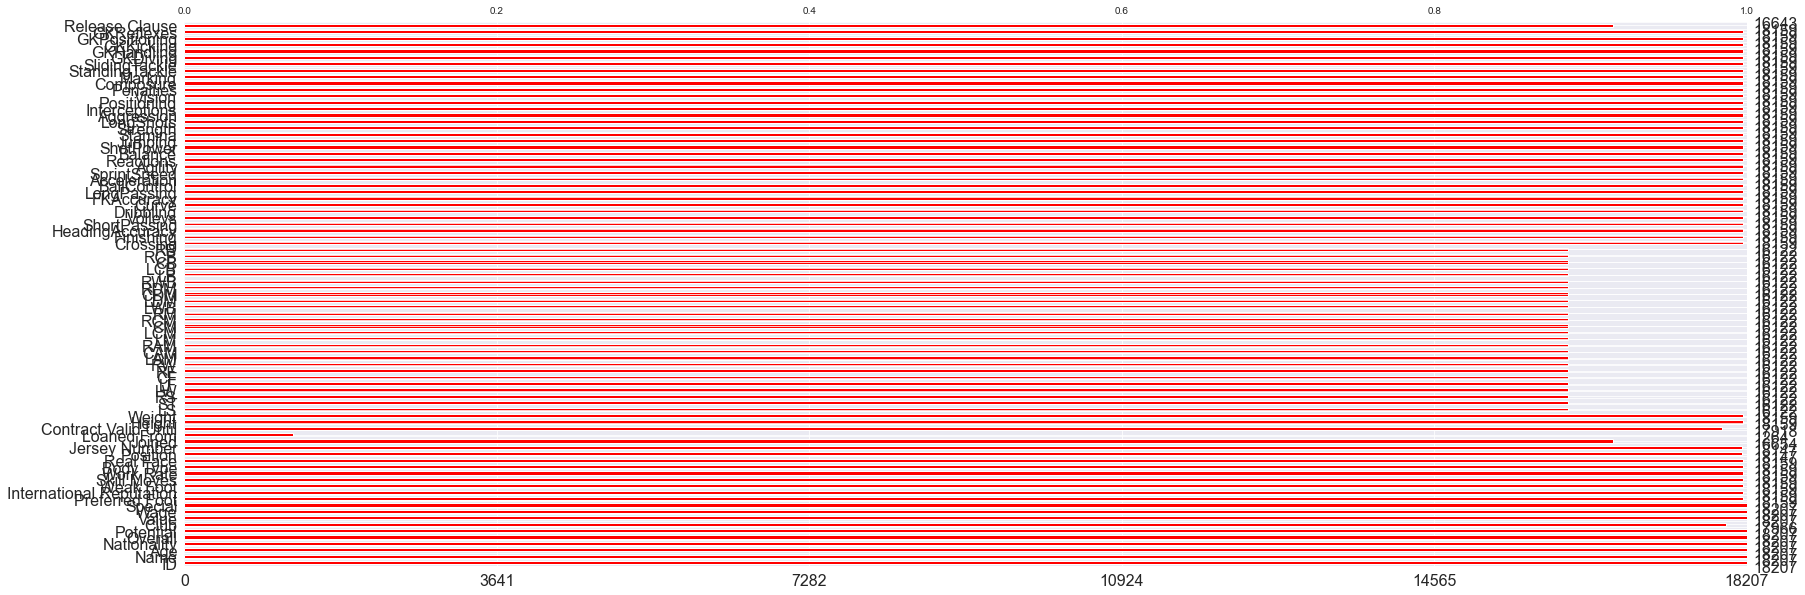

In [6]:
df.drop(["Unnamed: 0", "Photo", "Flag", "Club Logo"], axis = 1, inplace = True)
#데이터 분석에 불필요한 변수 제거(인덱스, 선수 사진, 국기 사진, 클럽 로고)

msno.bar(df.sample(18207), (28,10), color = "red")
#결측치 시각화

*결측치 시각화 결과, 일정 변수들이 동일한 숫자만큼 결측돼있는 것을 확인했습니다.

In [7]:
df.isnull().sum()

# 48 이라는 결측값이 반복됨 (Height, Weight etc.) -> 같은 아이디로부터 발견된건지 check 작업을 진행했습니다.

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

In [8]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


*같은 선수들로부터 생성된 결측치인 것을 확인했습니다.

In [9]:
df.drop(df.index[missing_height],inplace =True)

df.isnull().sum()

#반복된 결측값 48이 없어진 것을 확인했습니다

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 85, dtype: int64

In [10]:
#추가 결측값 제거, 'Loaned From','Release Clause','Joined'

df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

* 분석

In [11]:
#국가별 선수 인원수 & 선수가 가장 많은 상위 5개국

print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))

Total number of countries : 164
England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64


*잉글랜드 > 독일 > 스페인 > 아르헨티나 > 프랑스 순으로 등록된 축구 선수가 많습니다.

In [12]:
# 클럽별 선수 인원수 & 선수가 가장 많은 상위 5개 클럽

print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
Eintracht Frankfurt    33
Valencia CF            33
Newcastle United       33
Manchester United      33
Liverpool              33
Name: Club, dtype: int64


*프랑크푸르트, 발렌시아, 뉴캐슬, 맨유, 리버풀이 보유한 축구 선수가 가장 많은 공동 팀으로 확인됐습니다.

In [13]:
#최대 성장 가능성 선수 & 최고 종합 점수

print('Maximum Potential : '+ str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


*가장 높은 잠재력을 가진 선수는 킬리안 음바페, 가장 높은 퍼포먼스 점수를 가진 선수는 리오넬 메시로 확인됐습니다.

In [14]:
#Value & Wage 데이터 정제(object 변수를 숫자형 변수로 변환)

def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [15]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [16]:
# 최고 value 선수 & 최고 wage 선수 

print("Highest value: " + str(df.loc[df.Value.idxmax()][1]))
print("Highest wage: " + str(df.loc[df.Wage.idxmax()][1]))

Highest value: Neymar Jr
Highest wage: L. Messi


*가장 높은 가치를 지닌 선수는 네이마르, 가장 높은 임금을 받는 선수는 리오넬 메시로 확인됐습니다.

* EDA

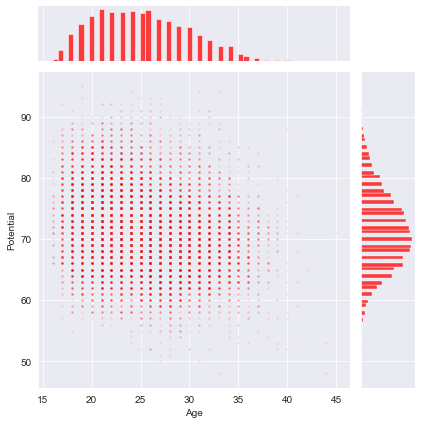

In [17]:
#x축 : 선수 나이, y축 : 잠재력 점수

sns.jointplot(x = df.Age, y = df.Potential, joint_kws = {"alpha" : 0.1, "s" : 5, "color" : "red" },\
             marginal_kws = {"color":"red"})

*Potential(잠재력) 수치는 나이가 들수록 감소하는것을 확인했습니다, 이는 흔히 말하는 aging curve(에이징 커브, 나이에 따른 관련 능력 쇠퇴) 와 연관돼있음을 알 수 있습니다.

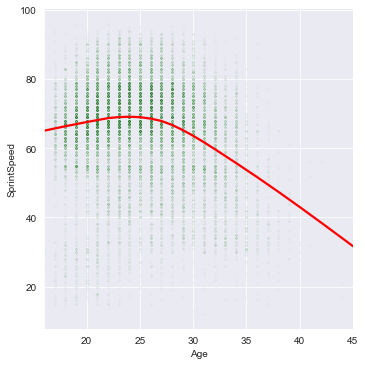

In [18]:
#x축 : 선수 나이, y축 : 가속력

sns.lmplot(data = df, x = "Age", y = "SprintSpeed", lowess = True, scatter_kws = {"alpha":0.01, "s":5,\
                                                                                 "color":"green"},\
          line_kws = {"color":"red"})

*마찬가지로 선수의 sprint speed 또한 나이에 반비례하는 것을 확인할 수 있었습니다.

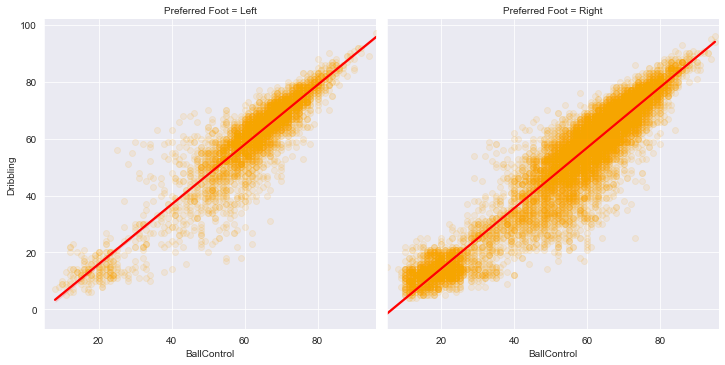

In [19]:
#선수 볼 컨트롤 능력에 따른 드리블링 점수 비교(x축 : 볼컨트롤, y축 : 드리블링, 오른발 & 왼발잡이 구분)

sns.lmplot(x = "BallControl", y = "Dribbling", data = df, col = "Preferred Foot",\
          scatter_kws = {"alpha":0.1, "color":"orange"},\
          line_kws = {"color":"red"})

*오른발잡이, 왼발잡이 선수 모두 볼컨트롤 능력과 드리블링 능력 간 양의 상관관계를 확인했습니다.

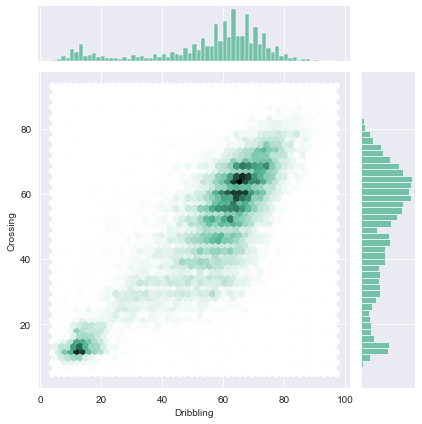

In [20]:
#드리블링에 따른 크로싱 능력 비교(x축 : 드리블링 점수, y축 : 크로스 점수)

sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391")

*선수들의 볼컨트롤 능력과 크로스 능력 간 양의 상관관계를 확인했습니다.

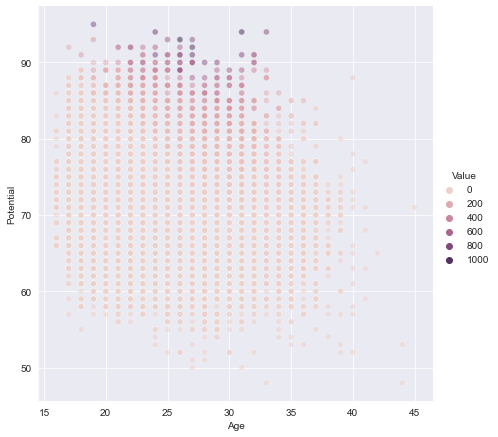

In [21]:
#선수 나이에 따른 potential + value

value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data = df)

*선수 나이 25 세 ~ 30 세 구간에서 보통 높은 잠재력 점수와 선수 가치를 지니고 있는 사실을 알 수 있습니다.

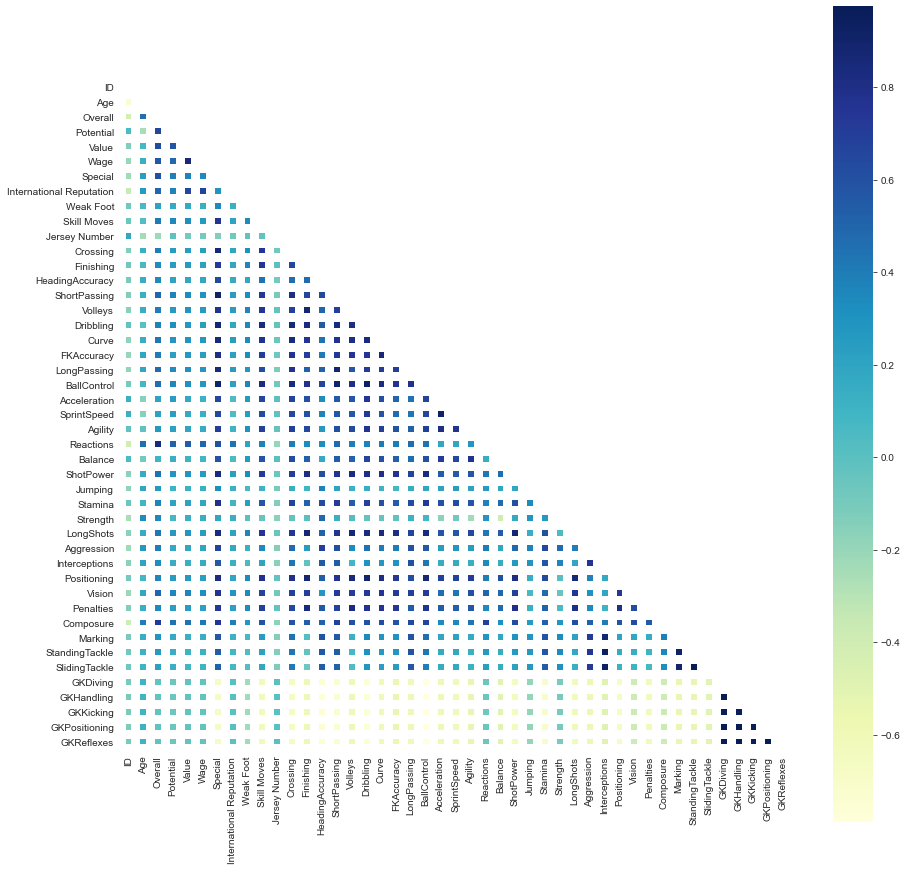

In [22]:
#heatmap 시각화

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (15, 15))
    ax = sns.heatmap(corr, mask = mask, square = True, linewidth = 8, cmap = "YlGnBu")

*골키핑 능력은 다른 능력치들과 비교했을 때 낮은 상관 관계를 보입니다.

*dribbling, volleys, passing 능력 등 사이에서 비교적 높은 상관 관계를 보입니다.

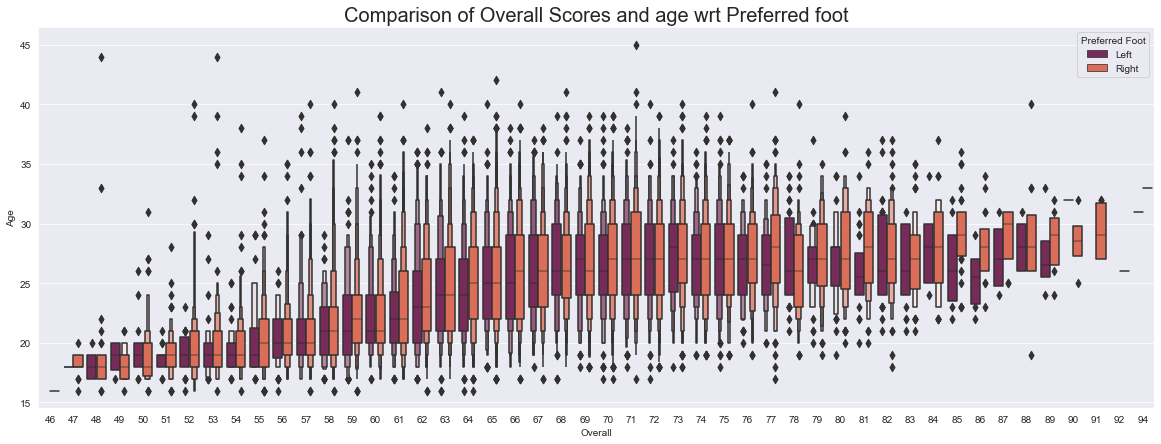

In [23]:
plt.rcParams["figure.figsize"] = (20, 7)
plt.style.use("seaborn-dark-palette")

sns.boxenplot(df.Overall, df.Age, hue = df["Preferred Foot"], palette = "rocket")
plt.title("Comparison of Overall Scores and age wrt Preferred foot", fontsize = 20)
plt.show()

*대체적으로 오른발잡이 선수가 많은 것을 알 수 있습니다.

*주로 높은 overall score(총괄 점수) 를 갖고있는 축구 선수는 대체로 오른발잡이 선수가 많다는 사실을 알 수 있습니다.

In [24]:
#관심 변수만 묶은 후, 미니 데이터셋 생성

cols = ["Age", "Overall", "Potential", "Acceleration", "SprintSpeed", "Agility", "Stamina",\
       "Strength", "Preferred Foot"]
df_small = df[cols]

df_small.head()

,Age,Overall,Potential,Acceleration,SprintSpeed,Agility,Stamina,Strength,Preferred Foot
0,31,94,94,91.0,86.0,91.0,72.0,59.0,Left
1,33,94,94,89.0,91.0,87.0,88.0,79.0,Right
2,26,92,93,94.0,90.0,96.0,81.0,49.0,Right
3,27,91,93,57.0,58.0,60.0,43.0,64.0,Right
4,27,91,92,78.0,76.0,79.0,90.0,75.0,Right


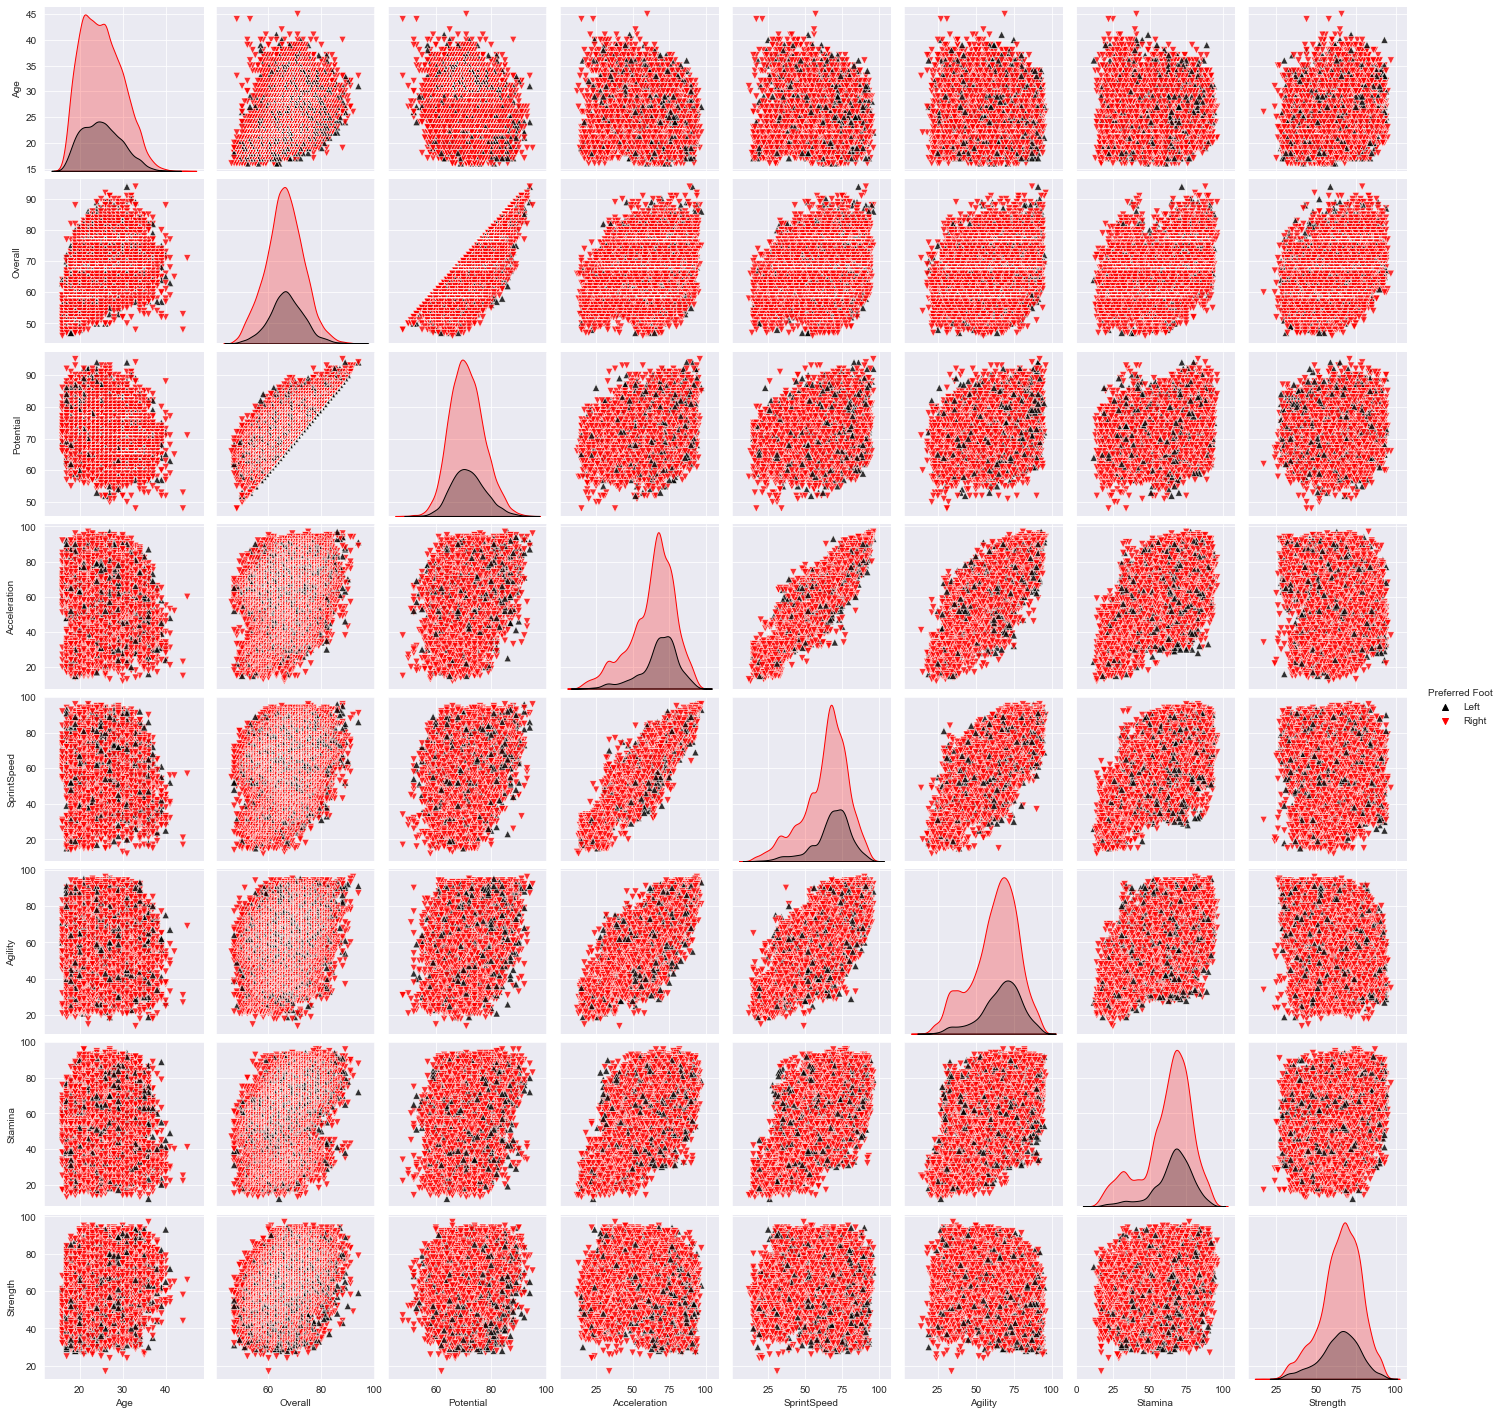

In [25]:
sns.pairplot(df_small, hue = "Preferred Foot", palette = ["black", "red"], plot_kws = \
            dict(s = 50, alpha = 0.8), markers = ["^", "v"])

*대부분의 축구 선수들은 오른발 잡이인 사실을 알 수 있습니다.
*potential 과 overall(총괄 점수) 사이의 특이한 관계를 확인할 수 있었습니다.
*민첩성 vs 스프린트 속도, 민첩성 vs 가속도, 민첩성 vs 스태미나 사이 양의 선형 관계를 확인할 수 있었습니다.